In [98]:
#lets start the unit1redo over, just to make sure you remember!!!
import torch
from torch import nn
import matplotlib.pyplot as plt

#device agnostic code:
if torch.cuda.is_available():
    device="cuda"
elif torch.backends.mps.is_available():
    device="mps"
else:
    device="cpu"


In [99]:
#now, lets make the dataset:
#lets make it a linear regression:

weights = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step) #will return a size [50] tensor with values 0 to 0.98
Y = X * weights + bias


In [100]:
#now, lets do a train-test split on our data using tensor slicing and sckit

train_split = 0.8
X_train, X_test = X[:round(train_split * len(X))],X[round(train_split * len(X)):]
Y_train, Y_test = Y[:round(train_split * len(Y))],Y[round(train_split * len(Y)):]

X_train,X_test,Y_train,Y_test



(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800]),
 tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
         0.9800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
         0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
         0.6780, 0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900,
         0.8040, 0.8180, 0.8320, 0.8460]),
 tensor([0.8600, 0.8740, 0.8880, 0.9020, 0.9160, 0.9300, 0.9440, 0.9580, 0.9720,
         0.9860]))

In [101]:
#can also just use the builtin
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,shuffle=False)
X_train,X_test,Y_train,Y_test #size [40] for train, [10] for test

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800]),
 tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
         0.9800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
         0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
         0.6780, 0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900,
         0.8040, 0.8180, 0.8320, 0.8460]),
 tensor([0.8600, 0.8740, 0.8880, 0.9020, 0.9160, 0.9300, 0.9440, 0.9580, 0.9720,
         0.9860]))

In [102]:
#now, lets put our data into a pandas dataframe for easier printing:
import pandas as pd

data_train = {
    "Training Data": X_train,
    "Training Labels": Y_train
}
data_test = {
    "Testing Data": X_test,
    "Testing Labels": Y_test
}

df_train = pd.DataFrame(data=data_train)
df_test = pd.DataFrame(data=data_test)

df_train.head(),df_test.head()




(   Training Data  Training Labels
 0           0.00            0.300
 1           0.02            0.314
 2           0.04            0.328
 3           0.06            0.342
 4           0.08            0.356,
    Testing Data  Testing Labels
 0          0.80           0.860
 1          0.82           0.874
 2          0.84           0.888
 3          0.86           0.902
 4          0.88           0.916)

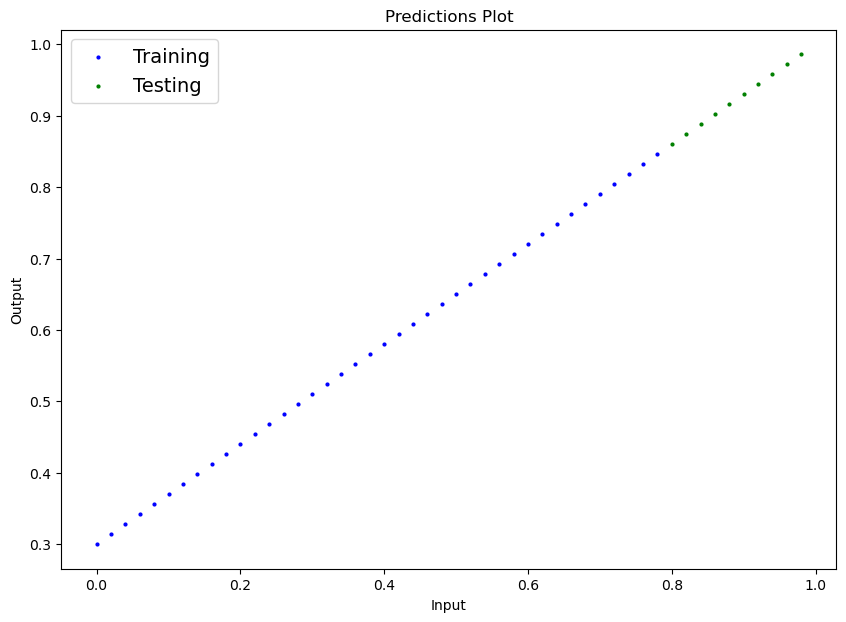

In [103]:
#now, lets plot em:
def plot_predictions(train_data=X_train,train_labels=Y_train,test_data=X_test,test_labels=Y_test,predictions=None):
    #first, define the figure
    plt.figure(figsize=(10,7))
    #now the scatter:
    plt.scatter(df_train["Training Data"],df_train["Training Labels"],c="b",s=4,label="Training")
    plt.scatter(df_test["Testing Data"],df_test["Testing Labels"],c="g",s=4,label="Testing")

    if predictions is not None:
        plt.scatter(df_test["Testing Data"],predictions,c="r",s=4,label="Predictions")
    plt.legend(prop={"size":14})
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.title("Predictions Plot")

plot_predictions()


In [104]:
# Now, we can start by using the requests:

from pathlib import Path
import requests

if Path("helper_functions.py").is_file():
    print("Allready downloaded.")
else:
    request = requests.get(url="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    #now have a Responce object
    with open(file="helper_functions.py",mode="wb",newline="") as file:
        file.write(request.content)

Allready downloaded.


In [105]:
#Now, we get to define the model!!! lest use a linear layer this time. REMEMBER TO UNSQUEEZE YOUR DATA BEFORE ENTERING IN MODEL

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.Linear1 = nn.Linear(in_features=1,out_features=1)
    def forward(self,X: torch.Tensor) -> torch.Tensor:
        return self.Linear1(X)

torch.manual_seed(42)
model = LinearRegressionModel().to(device) #move the model to the GPU
print(list(model.parameters()),model.state_dict())

[Parameter containing:
tensor([[0.7645]], device='mps:0', requires_grad=True), Parameter containing:
tensor([0.8300], device='mps:0', requires_grad=True)] OrderedDict({'Linear1.weight': tensor([[0.7645]], device='mps:0'), 'Linear1.bias': tensor([0.8300], device='mps:0')})


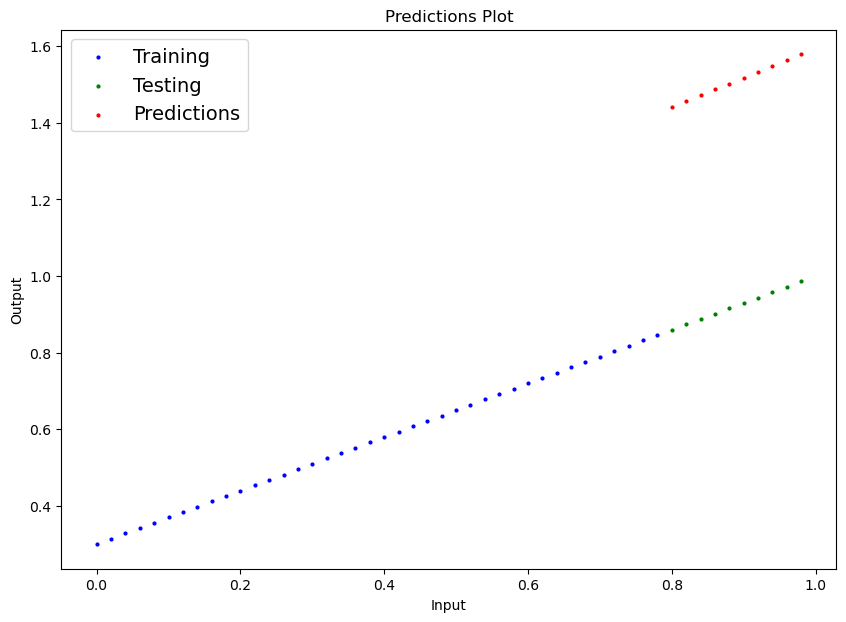

In [106]:
#Now, do a shot in the dark:

with torch.inference_mode():
    y_preds = model(X_test.unsqueeze(dim=1).to(device))
    plot_predictions(predictions=y_preds.detach().cpu().numpy())

In [107]:
#Now, path
from pathlib import Path
from datetime import datetime

#now, lets get the constants
MODEL_NAME = "Unit1_Trial"
EXPERIMENT_NAME = "Exp1"

now = datetime.now()
TIMESTAMP = f"{now.month}-{now.day}-{str(now.year)[-2:]}@{now.strftime("%I-%M-%S%p")}"


#now, the paths:
BASE_DIR = Path(f"{MODEL_NAME}")
EXPERIMENT_DIR = BASE_DIR / f"{EXPERIMENT_NAME}"

MODEL_DIR = EXPERIMENT_DIR / "models"
GRAPHS_DIR = EXPERIMENT_DIR / "graphs"
RESULTS_DIR = EXPERIMENT_DIR / "results"
LOSS_GRAPH_DIR = GRAPHS_DIR / "loss"
ACC_GRAPH_DIR = GRAPHS_DIR / "accuracy"

#now, lets make these directories:
for directory in [MODEL_DIR,GRAPHS_DIR,RESULTS_DIR,LOSS_GRAPH_DIR,ACC_GRAPH_DIR]:
    directory.mkdir(parents=True,exist_ok=True)

#lastly, lets get the file paths in order:
MODEL_PATH = MODEL_DIR / f"{MODEL_NAME}_{EXPERIMENT_NAME}_{TIMESTAMP}"
RESULTS_PATH = RESULTS_DIR / f"{MODEL_NAME}_{EXPERIMENT_NAME}_{TIMESTAMP}"
LOSS_GRAPH_PATH = LOSS_GRAPH_DIR / f"{MODEL_NAME}_{EXPERIMENT_NAME}_{TIMESTAMP}"
ACC_GRAPH_PATH = ACC_GRAPH_DIR / f"{MODEL_NAME}_{EXPERIMENT_NAME}_{TIMESTAMP}"


print(f"{MODEL_NAME}_{EXPERIMENT_NAME}_{TIMESTAMP}")


Unit1_Trial_Exp1_9-4-25@02-34-45PM


In [108]:
#now, we have to define our loss function and optimizer:

loss_fn = torch.nn.L1Loss() #this is the Mean Average Error Loss, used commonly in regression problems
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001) #this is the stochastic grad descent optimizer

In [109]:
#prepare Data for training loop (only needs ot be run once)

X_train,X_test,Y_train,Y_test = [tensor.to(device) for tensor in [X_train,X_test,Y_train,Y_test]]
X_train,X_test,Y_train,Y_test = [tensor.unsqueeze(dim=1) for tensor in [X_train,X_test,Y_train,Y_test]]
for tensor in [X_train,X_test,Y_train,Y_test]:
    print(tensor.shape,tensor.device)

torch.Size([40, 1]) mps:0
torch.Size([10, 1]) mps:0
torch.Size([40, 1]) mps:0
torch.Size([10, 1]) mps:0


In [110]:
#training loop time!
import csv


#now, lets get the loop ready by getting the csv writer set up fo rthe training loop

epochs = 1000

with open(file=RESULTS_PATH,mode="w",newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Epoch","Train Loss","Test Loss"])
    #now the actual loop
    for epoch in range(epochs):
        #first forward pass
        y_preds = model(X_train) #y preds is the size [40,1]
        #now, calcualte the loss
        loss = loss_fn(Y_train,y_preds)
        #now zero the gradients to prepare for backprop
        optimizer.zero_grad()
        #now,preform backwards pass
        loss.backward()
        #now, move the optimizer in the step direction of the calcualted gradient
        optimizer.step()

        #TESTING LOOP:
        with torch.inference_mode():
            model.eval()
            #forwards pass
            y_test_preds = model(Y_test)
            #Calcualte the loss
            test_loss = loss_fn(Y_test,y_test_preds)
            #now, add the results to the CSV file:
            #first define the writable constants
            training_loss_write = loss.detach().cpu().numpy()
            testing_loss_write = test_loss.detach().cpu().numpy()

            #now, write the row:
            writer.writerow([epoch,training_loss_write,testing_loss_write])

            #now do the print every 10 epochs:
            if epoch % 10 == 0:
                print(f"Epoch: {epoch} | Training Loss: {training_loss_write} | Testing Loss: {testing_loss_write}")





Epoch: 0 | Training Loss: 0.5551779270172119 | Testing Loss: 0.6113170385360718
Epoch: 10 | Training Loss: 0.543657124042511 | Testing Loss: 0.5977174639701843
Epoch: 20 | Training Loss: 0.5321362614631653 | Testing Loss: 0.5841180086135864
Epoch: 30 | Training Loss: 0.5206153988838196 | Testing Loss: 0.5705185532569885
Epoch: 40 | Training Loss: 0.5090945959091187 | Testing Loss: 0.5569190382957458
Epoch: 50 | Training Loss: 0.49757376313209534 | Testing Loss: 0.5433195233345032
Epoch: 60 | Training Loss: 0.48605290055274963 | Testing Loss: 0.5297200083732605
Epoch: 70 | Training Loss: 0.47453197836875916 | Testing Loss: 0.5161204934120178
Epoch: 80 | Training Loss: 0.4630111753940582 | Testing Loss: 0.5025209784507751
Epoch: 90 | Training Loss: 0.4514903128147125 | Testing Loss: 0.48892146348953247
Epoch: 100 | Training Loss: 0.4399694502353668 | Testing Loss: 0.4753219783306122
Epoch: 110 | Training Loss: 0.4284486770629883 | Testing Loss: 0.4617224335670471
Epoch: 120 | Training Lo

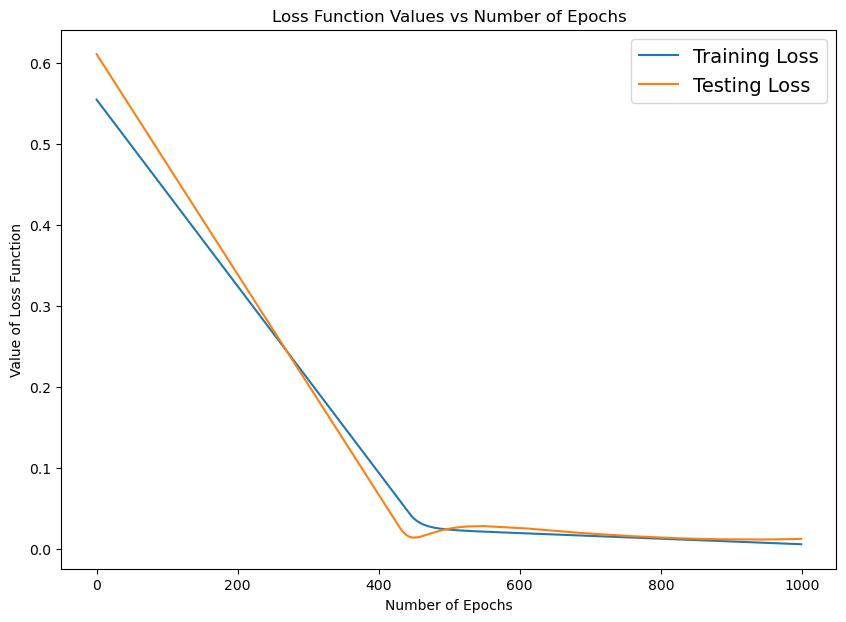

In [111]:
#now, lets create the loss function graphs:
import matplotlib.pyplot as plt
import csv
import pandas as pd

#first, lets import the data as a pd:
df = pd.read_csv(filepath_or_buffer=RESULTS_PATH)
#access elements via df["Epoch"]


#lets make the plot for the loss graphs
plt.figure(figsize=(10,7))
#
plt.plot(df["Epoch"],df["Train Loss"],label="Training Loss")
plt.plot(df["Epoch"],df["Test Loss"],label="Testing Loss")
plt.title("Loss Function Values vs Number of Epochs")
plt.xlabel("Number of Epochs")
plt.ylabel("Value of Loss Function")
plt.legend(prop={"size":14})
plt.savefig(LOSS_GRAPH_PATH)
plt.show()
plt.close()

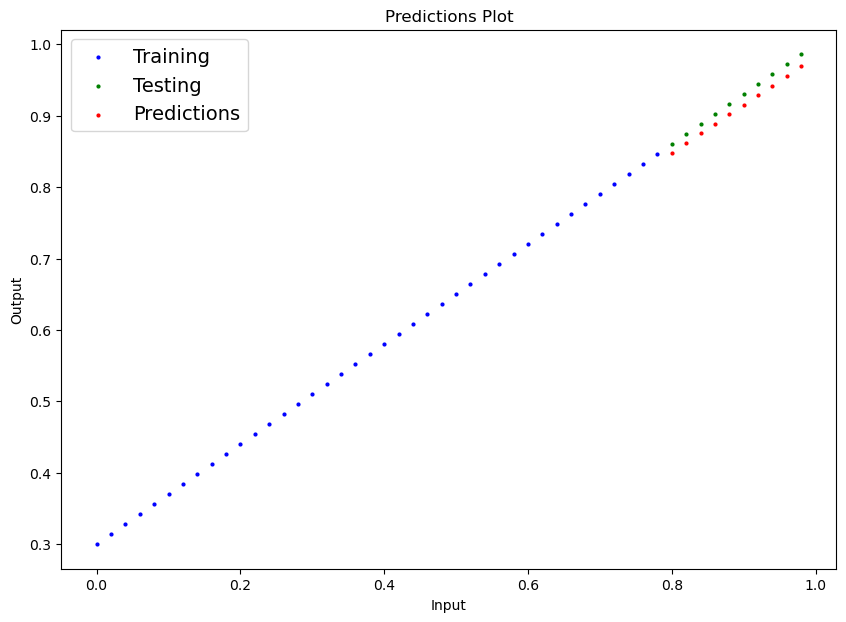

In [113]:
#now, lets do a test of the inference abilities of the model:

with torch.inference_mode():
    model.eval()
    y_preds = model(X_test)
    plot_predictions(predictions=y_preds.detach().cpu().numpy())

In [114]:
#now, we save the model:

torch.save(obj=model.state_dict(),f=MODEL_PATH)

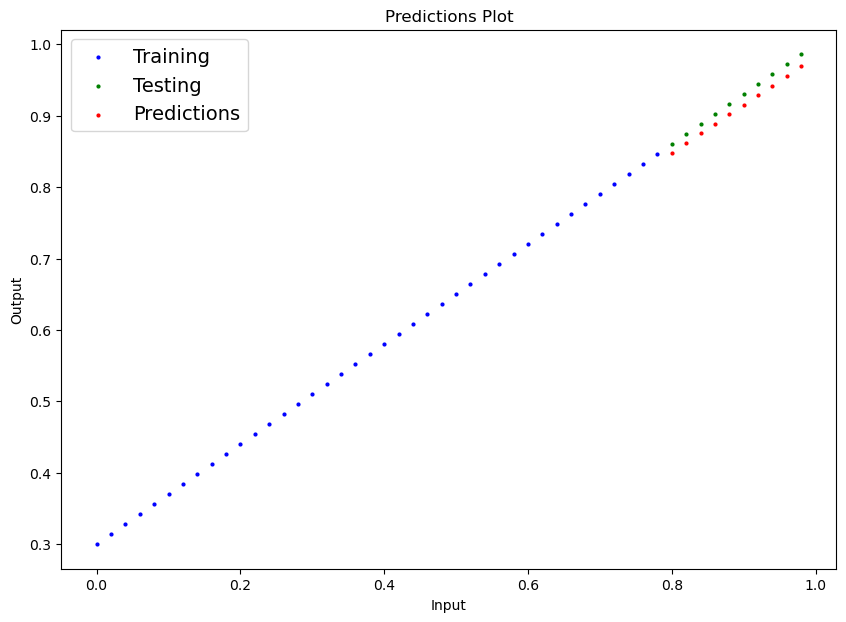

In [115]:
#now, lets load the saved model

model_loaded = LinearRegressionModel().to(device)
model_loaded.load_state_dict(torch.load(f=MODEL_PATH,weights_only=True,))
#infer on it
with torch.inference_mode():
    y_infer_preds = model_loaded(X_test)
    plot_predictions(predictions=y_infer_preds.detach().cpu().numpy())